In [87]:
import os
os.getcwd()

'/Users/austinclime/vs_code_projects/vix_approx/vix_approx_research'

In [ ]:
#! pip install numpy

#! pip install nbconvert



In [88]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import VBox,HBox, Layout

In [ ]:
# https://www.freecodecamp.org/news/matplotlib-figure-size-change-plot-size-in-python/
# https://www.geeksforgeeks.org/how-to-update-a-plot-in-matplotlib/
# https://kapernikov.com/ipywidgets-with-matplotlib/
# https://saturncloud.io/blog/how-to-export-current-notebook-in-html-on-jupyter/

In [ ]:
n=20
ub=4
lb=0
dx=(ub-lb)/n
def f(x):
  return 3*np.sqrt(x)
area=0
X=np.arange(lb,ub+dx,dx)
for i in range(len(X)-1):
  #print(i,X[i],X[i+1],f(X[i]))
  area+=f(X[i])*dx

  xs=[X[i],X[i+1],X[i+1],X[i],X[i]]
  ys=[0,0,f(X[i]),f(X[i]),0]
  if i!=list(range(len(X)-1))[-1]:
    #plt.plot(xs, ys, color="red",label=f'$L_{n}$')
    plt.plot(xs, ys, color="red")
  else:
    #plt.plot(xs, ys, color="red")
    plt.plot(xs, ys, color="red",label=f'$L_{n}$')


step_size=0.1
X=np.arange(lb,ub+step_size,step_size)
plt.plot(X,f(X),label=r'$f(x)=\frac{1}{x\,ln\,x}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(area)

In [ ]:
n=30
ub=4
lb=0
dx=(ub-lb)/n
def f(x):
  return 3/(x+1)

#X=np.arange(lb,ub+dx,dx)

#step_size=0.1
step_size=dx
X=np.arange(lb,ub+step_size,step_size)

plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)

#plot 1:

xs=[]
ys=[]
for i in range(len(X)-1):
  x_i=[X[i],X[i+1],X[i+1],X[i],X[i]]
  y_i=[0,0,f(X[i]),f(X[i]),0]
  xs.extend(x_i)
  ys.extend(y_i)


plt.plot(xs, ys, color="red",label=f'$Lefthand$')



plt.plot(X,f(X),label=r'$f(x)=\frac{3}{x+1}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
#plt.show()


#plt.plot(x,y)

#plot 2:
plt.subplot(2, 1, 2)

xs=[]
ys=[]
for i in range(len(X)-1):
  x_i=[X[i],X[i+1],X[i+1],X[i],X[i]]
  y_i=[0,0,f(X[i+1]),f(X[i+1]),0]
  xs.extend(x_i)
  ys.extend(y_i)


plt.plot(xs, ys, color="red",label=f'$Righthand$')

plt.plot(X,f(X),label=r'$f(x)=\frac{3}{x+1}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


plt.show()

In [ ]:
n=30
ub=4
lb=0


def make_plot(n,ub,lb):
    dx=(ub-lb)/n
    def f(x):
        return 3/(x+1)

    #X=np.arange(lb,ub+dx,dx)

    #step_size=0.1
    step_size=dx
    X=np.arange(lb,ub+step_size,step_size)

    plt.figure(figsize=(10,6))
    plt.subplot(2, 1, 1)

    #plot 1:
    xs=[]
    ys=[]
    for i in range(len(X)-1):
        x_i=[X[i],X[i+1],X[i+1],X[i],X[i]]
        y_i=[0,0,f(X[i]),f(X[i]),0]
        xs.extend(x_i)
        ys.extend(y_i)
    plt.plot(xs, ys, color="red",label=f'$Lefthand$')

    plt.plot(X,f(X),label=r'$f(x)=\frac{3}{x+1}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

make_plot(n,ub,lb)

def update_plot(change):
    return make_plot(change['new'],ub,lb)





def my_ui(_):

    style={'description_width':'200px'}
    layout={'description_width':'900px'}
    out=widgets.Output(layout=layout,style=style)
     

    slider=widgets.IntSlider(
                value=7,
                min=0,
                max=10,
                step=1,
                description='Test:',
                disabled=False,
                continuous_update=False,
                orientation='horizontal',
                readout=True,
                readout_format='d')

    slider.observe(update_plot,'value')

    UI=VBox([
        HBox([slider]),
        out])

    return UI


my_ui(_)

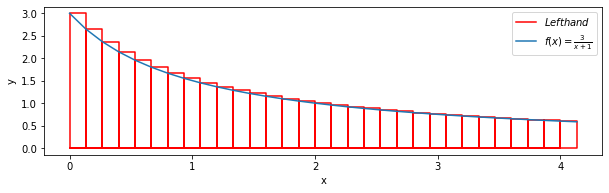

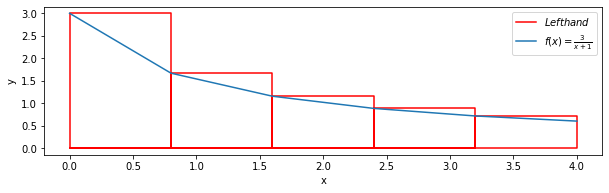

In [84]:
n=30
ub=4
lb=0

def f(x):
    return 3/(x+1)

def lefthand_approx(n,ub,lb):
    dx=(ub-lb)/n
    step_size=dx
    X=np.arange(lb,ub+step_size,step_size)
    xs=[]
    ys=[]
    for i in range(len(X)-1):
        x_i=[X[i],X[i+1],X[i+1],X[i],X[i]]
        y_i=[0,0,f(X[i]),f(X[i]),0]
        xs.extend(x_i)
        ys.extend(y_i)
    return xs,ys


def make_plot(n,ub,lb):
    #plt.clf()
    dx=(ub-lb)/n
    #X=np.arange(lb,ub+dx,dx)
    #step_size=0.1
    step_size=dx
    X=np.arange(lb,ub+step_size,step_size)

    plt.figure(figsize=(10,6))
    plt.subplot(2, 1, 1)

    xs,ys=lefthand_approx(n,ub,lb)
    plt.plot(xs, ys, color="red",label=f'$Lefthand$')

    plt.plot(X,f(X),label=r'$f(x)=\frac{3}{x+1}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    #plt.show()



def update_num_steps(change):
    #plt.clf()
    #return make_plot(change['new'],ub,lb)
    make_plot(change['new'],ub,lb)



def my_ui(_):

    style={'description_width':'200px'}
    layout={'description_width':'900px'}
    out=widgets.Output(layout=layout,style=style)
     

    slider=widgets.IntSlider(
                value=7,
                min=1,
                max=10,
                step=1,
                description='Num of Steps:',
                disabled=False,
                continuous_update=False,
                orientation='horizontal',
                readout=True,
                readout_format='d')

    slider.observe(update_num_steps,'value')

    UI=VBox([
        HBox([slider]),
        out])

    return UI


display(my_ui(_))

make_plot(n,ub,lb)
#plt.figure(figsize=(10,6))
#plt.subplot(2, 1, 1)
plt.show()



In [86]:
! jupyter nbconvert --to html --no-input simpson.ipynb
#! jupyter nbconvert --to html simpson.ipynb

[NbConvertApp] Converting notebook simpson.ipynb to html
[NbConvertApp] Writing 584344 bytes to simpson.html


In [2]:
#! pip install ipympl 
#! pip install numpy --upgrade

# We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

     |████████████████████████████████| 19.8 MB 6.6 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

modin 0.8.3 requires pandas==1.1.5, but you'll have pandas 1.2.3 which is incompatible.


In [1]:
#! pip install ipympl 
%matplotlib widget
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt


def say_my_name(name):
    """
    Print the current widget value in short sentence
    """
    print(f'My name is {name}')
     
widgets.interact(say_my_name, name=["Jim", "Emma", "Bond"]);

interactive(children=(Dropdown(description='name', options=('Jim', 'Emma', 'Bond'), value='Jim'), Output()), _…

IntSlider(value=1, continuous_update=False, description='$\\Omega$', max=10)

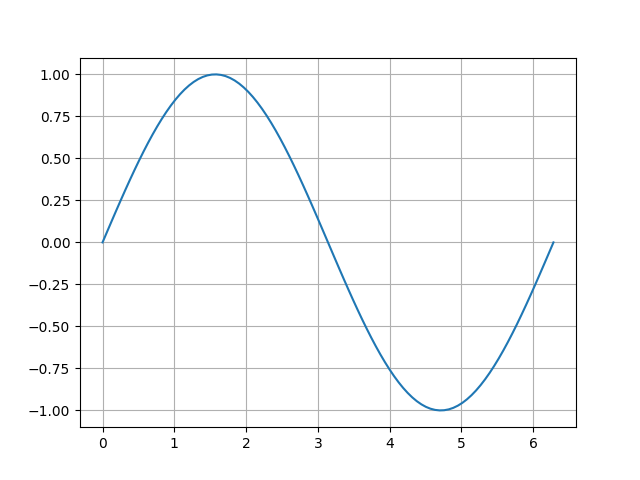

In [9]:
x = np.linspace(0, 2 * np.pi, 100)
 
fig, ax = plt.subplots()
line, = ax.plot(x, np.sin(x))
ax.grid(True)
 
def update(change):
    line.set_ydata(np.sin(change.new * x))
    fig.canvas.draw()
     
int_slider = widgets.IntSlider(
    value=1, 
    min=0, max=10, step=1,
    description='$\Omega$',
    continuous_update=False
)
int_slider.observe(update, 'value')
int_slider

In [ ]:
x = np.linspace(0, 2 * np.pi, 100)
 
fig, ax = plt.subplots()
line, = ax.plot(x, np.sin(x))
ax.grid(True)
 
def update(change):
    line.set_ydata(np.sin(change.new * x))
    fig.canvas.draw()
     
int_slider = widgets.IntSlider(
    value=1, 
    min=0, max=10, step=1,
    description='$\Omega$',
    continuous_update=False
)
int_slider.observe(update, 'value')
int_slider